<a href="https://colab.research.google.com/github/ImenGa/Algorithm-and-its-elements/blob/main/Vehicle_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/Kitti3/train
!ls /content/drive/MyDrive/Kitti3/val
!ls /content/drive/MyDrive/Kitti3/test

'000001 (1).png'  '000441 (1).txt'   000836.txt   001295.png   001751.txt   002241.txt	 002619.txt
'000001 (1).txt'  '000442 (1).png'   000837.txt   001295.txt   001752.png   002242.png	 002620.png
'000002 (1).png'  '000442 (1).txt'   000838.txt   001296.png   001752.txt   002242.txt	 002620.txt
'000002 (1).txt'  '000443 (1).png'   000839.txt   001296.txt   001753.png   002243.png	 002621.png
'000003 (1).png'  '000443 (1).txt'   000842.txt   001297.png   001753.txt   002243.txt	 002621.txt
'000003 (1).txt'  '000444 (1).png'   000843.txt   001297.txt   001754.png   002244.png	 002622.png
'000004 (1).png'  '000444 (1).txt'   000844.txt   001298.png   001754.txt   002244.txt	 002622.txt
'000004 (1).txt'  '000445 (1).png'   000845.txt   001298.txt   001755.png   002245.png	 002623.png
'000006 (1).png'  '000445 (1).txt'   000846.txt   001299.png   001755.txt   002245.txt	 002623.txt
'000006 (1).txt'  '000446 (1).png'   000847.txt   001299.txt   001756.png   002246.png	 002624.png
'000007 (1

In [3]:
import os

#  le chemin de base de votre dossier Kitti3
data_path = '/content/drive/MyDrive/Kitti3'


train_path = os.path.join(data_path, 'train')
val_path = os.path.join(data_path, 'val')
test_path = os.path.join(data_path, 'test')

# la structure des dossiers
assert os.path.exists(train_path), f"Dossier 'train' non trouvé dans {data_path}"
assert os.path.exists(val_path), f"Dossier 'val' non trouvé dans {data_path}"
assert os.path.exists(test_path), f"Dossier 'test' non trouvé dans {data_path}"

# Créeration de contenu du fichier data.yaml
data_yaml = f"""
train: {train_path}
val: {val_path}
test: {test_path}

nc: 3
names: ['Car', 'Truck', 'Cyclist']
"""

# Sauvegardage le fichier data.yaml
yaml_path = os.path.join(data_path, 'data.yaml')
with open(yaml_path, 'w') as file:
    file.write(data_yaml)

print(f"Le fichier 'data.yaml' a été créé et sauvegardé à l'emplacement {yaml_path}")


Le fichier 'data.yaml' a été créé et sauvegardé à l'emplacement /content/drive/MyDrive/Kitti3/data.yaml


In [4]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.8/906.8 kB 50.0 MB/s eta 0:00:00


In [5]:
import os
from ultralytics import YOLO
import matplotlib.pyplot as plt

# le chemin de base de votre dossier Kitti3
data_path = '/content/drive/MyDrive/Kitti3'

# un dossier pour sauvegarder le modèle entraîné
model_trained_path = os.path.join(data_path, 'model_trained')
if not os.path.exists(model_trained_path):
    os.makedirs(model_trained_path)

# le modèle YOLOv8
model = YOLO("yolov8n.yaml")

# l'entraînement
results = model.train(
    data=os.path.join(data_path, 'data.yaml'),
    epochs=35,            # Nombre d'époques d'entraînement
    batch=16,             # Taille du lot
    imgsz=640,            # Taille de l'image
    save=True,            # Sauvegarder les poids du modèle
    save_period=-1,       # Sauvegarde à chaque époque (si -1, sauvegarde uniquement à la fin)
    project=model_trained_path,  # Répertoire où les résultats seront enregistrés
    name='yolov8_trained',  # Nom du sous-dossier pour les poids et les résultats
    verbose=True
)

# Récupération des résultats de l'entraînement
train_loss = results.history['loss']  # Perte d'entraînement
val_loss = results.history['val_loss']  # Perte de validation
precision = results.history['precision']  # Précision
recall = results.history['recall']  # Rappel

# Affichage des courbes d'entraînement
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Courbe de perte (loss)
axes[0].plot(train_loss, label='Train Loss', color='blue')
axes[0].plot(val_loss, label='Val Loss', color='red')
axes[0].set_title('Courbe de Perte')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Courbe de précision
axes[1].plot(precision, label='Train Precision', color='green')
axes[1].set_title('Courbe de Précision')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Precision')
axes[1].legend()

# Courbe de rappel
axes[2].plot(recall, label='Train Recall', color='orange')
axes[2].set_title('Courbe de Rappel')
axes[2].set_xlabel('Epochs')
axes[2].set_ylabel('Recall')
axes[2].legend()

# Afficher les courbes
plt.tight_layout()
plt.show()

# Afficher un message pour indiquer où le modèle est sauvegardé
print(f"Le modèle entraîné a été sauvegardé dans {model_trained_path}")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/Kitti3/data.yaml, epochs=35, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Kitti3/model_trained, name=yolov8_trained, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True,

100%|██████████| 755k/755k [00:00<00:00, 85.0MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 262MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Kitti3/train... 2082 images, 2 backgrounds, 0 corrupt: 100%|██████████| 2084/2084 [06:54<00:00,  5.03it/s]


train: New cache created: /content/drive/MyDrive/Kitti3/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Kitti3/val... 484 images, 44 backgrounds, 0 corrupt: 100%|██████████| 484/484 [00:15<00:00, 31.11it/s]


val: New cache created: /content/drive/MyDrive/Kitti3/val.cache
Plotting labels to /content/drive/MyDrive/Kitti3/model_trained/yolov8_trained/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/Kitti3/model_trained/yolov8_trained
Starting training for 35 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/35       2.4G       3.76      3.977      3.757         31        640: 100%|██████████| 131/131 [00:17<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.36it/s]

                   all        484       1938   0.000645     0.0382    0.00204   0.000754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/35      2.31G      2.874      2.581      2.419         57        640: 100%|██████████| 131/131 [00:15<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.75it/s]

                   all        484       1938      0.775      0.104     0.0847     0.0338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/35      2.38G      2.429      2.051      1.992         40        640: 100%|██████████| 131/131 [00:14<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.86it/s]


                   all        484       1938      0.824      0.141      0.149     0.0598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/35       2.3G      2.198      1.796        1.8         48        640: 100%|██████████| 131/131 [00:14<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.15it/s]

                   all        484       1938      0.856      0.153      0.204     0.0886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/35      2.39G       2.05      1.599      1.671         25        640: 100%|██████████| 131/131 [00:14<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.05it/s]


                   all        484       1938      0.357      0.299       0.26      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/35       2.4G       1.93      1.473      1.574         49        640: 100%|██████████| 131/131 [00:14<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.95it/s]


                   all        484       1938      0.509      0.303      0.316      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/35      2.37G      1.839      1.398      1.533         36        640: 100%|██████████| 131/131 [00:14<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.14it/s]


                   all        484       1938      0.846      0.281      0.348       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/35      2.31G      1.757      1.304      1.467         33        640: 100%|██████████| 131/131 [00:14<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.12it/s]


                   all        484       1938      0.568      0.338      0.371      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/35       2.4G      1.693      1.249      1.426         32        640: 100%|██████████| 131/131 [00:14<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.05it/s]

                   all        484       1938      0.626      0.321      0.392      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/35      2.41G      1.633      1.189      1.391         59        640: 100%|██████████| 131/131 [00:14<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.62it/s]


                   all        484       1938      0.583      0.409      0.439      0.233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/35      2.38G      1.597      1.156      1.368         46        640: 100%|██████████| 131/131 [00:14<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.07it/s]


                   all        484       1938      0.573      0.405      0.439      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/35       2.3G      1.573      1.128      1.348         15        640: 100%|██████████| 131/131 [00:14<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.07it/s]


                   all        484       1938      0.572      0.451      0.474      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/35      2.39G      1.537      1.106      1.337         45        640: 100%|██████████| 131/131 [00:14<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.97it/s]


                   all        484       1938       0.58      0.445      0.477      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/35      2.43G      1.497      1.067      1.305         30        640: 100%|██████████| 131/131 [00:14<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.97it/s]

                   all        484       1938      0.666      0.461      0.502      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/35       2.4G      1.467       1.05       1.29         62        640: 100%|██████████| 131/131 [00:14<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.88it/s]


                   all        484       1938      0.611      0.405      0.461      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/35      2.31G      1.455       1.03      1.281         53        640: 100%|██████████| 131/131 [00:14<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.88it/s]


                   all        484       1938      0.619      0.466      0.526      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/35       2.4G      1.433     0.9985      1.268         59        640: 100%|██████████| 131/131 [00:14<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.86it/s]

                   all        484       1938      0.605      0.495       0.53      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/35      2.38G      1.396     0.9807       1.25         26        640: 100%|██████████| 131/131 [00:14<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.08it/s]


                   all        484       1938      0.684      0.511      0.559      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/35      2.38G      1.379     0.9717      1.242         22        640: 100%|██████████| 131/131 [00:14<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.04it/s]


                   all        484       1938        0.7      0.516      0.563      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/35      2.34G      1.361     0.9463      1.226         46        640: 100%|██████████| 131/131 [00:14<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.13it/s]


                   all        484       1938      0.644      0.519      0.548      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/35      2.36G      1.334      0.935      1.214         33        640: 100%|██████████| 131/131 [00:14<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.08it/s]


                   all        484       1938      0.598      0.529      0.559      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/35      2.39G      1.318     0.9136      1.203         17        640: 100%|██████████| 131/131 [00:14<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.95it/s]

                   all        484       1938      0.666      0.506      0.572      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/35      2.35G        1.3     0.8948      1.198         31        640: 100%|██████████| 131/131 [00:14<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.96it/s]


                   all        484       1938      0.568      0.513      0.555      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/35      2.32G      1.302     0.8906      1.193         36        640: 100%|██████████| 131/131 [00:14<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.03it/s]


                   all        484       1938       0.65       0.55      0.577      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/35      2.42G       1.29     0.8865      1.184         20        640: 100%|██████████| 131/131 [00:14<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.98it/s]


                   all        484       1938      0.603      0.587      0.603      0.365
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/35      2.36G       1.25     0.8769       1.17          9        640: 100%|██████████| 131/131 [00:15<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.10it/s]


                   all        484       1938      0.658      0.553       0.58       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/35      2.37G       1.22     0.8311       1.15         13        640: 100%|██████████| 131/131 [00:14<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.27it/s]


                   all        484       1938      0.619       0.56      0.602      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/35      2.26G      1.195     0.8152      1.142         14        640: 100%|██████████| 131/131 [00:14<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.24it/s]


                   all        484       1938      0.712      0.552      0.605      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/35      2.38G      1.182     0.8101      1.139         18        640: 100%|██████████| 131/131 [00:13<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.18it/s]


                   all        484       1938      0.628      0.595      0.621      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/35      2.28G      1.163     0.7885       1.13         20        640: 100%|██████████| 131/131 [00:14<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.42it/s]

                   all        484       1938      0.646      0.582      0.628      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/35      2.28G      1.168     0.7817      1.125         10        640: 100%|██████████| 131/131 [00:14<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.35it/s]

                   all        484       1938       0.71      0.594      0.639      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/35      2.29G      1.145     0.7726      1.119         12        640: 100%|██████████| 131/131 [00:14<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.42it/s]


                   all        484       1938      0.667      0.598      0.654      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/35      2.35G      1.136     0.7611      1.113         25        640: 100%|██████████| 131/131 [00:13<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.80it/s]


                   all        484       1938      0.708      0.593      0.653      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/35      2.29G      1.121     0.7554      1.103          9        640: 100%|██████████| 131/131 [00:13<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.71it/s]


                   all        484       1938      0.738      0.578      0.659      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/35      2.35G       1.11     0.7431      1.107         16        640: 100%|██████████| 131/131 [00:13<00:00,  9.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.06it/s]


                   all        484       1938      0.685      0.623      0.661      0.411

35 epochs completed in 0.175 hours.
Optimizer stripped from /content/drive/MyDrive/Kitti3/model_trained/yolov8_trained/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/Kitti3/model_trained/yolov8_trained/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/Kitti3/model_trained/yolov8_trained/weights/best.pt...
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8n summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.65it/s]


                   all        484       1938      0.739      0.577      0.659      0.411
                   Car        429       1764      0.806      0.779       0.85       0.57
                 Truck         66         67      0.806      0.597       0.69      0.463
               Cyclist         75        107      0.603      0.356      0.436        0.2
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /content/drive/MyDrive/Kitti3/model_trained/yolov8_trained


AttributeError: 'DetMetrics' object has no attribute 'history'. See valid attributes below.

    Utility class for computing detection metrics such as precision, recall, and mean average precision (mAP) of an
    object detection model.

    Args:
        save_dir (Path): A path to the directory where the output plots will be saved. Defaults to current directory.
        plot (bool): A flag that indicates whether to plot precision-recall curves for each class. Defaults to False.
        on_plot (func): An optional callback to pass plots path and data when they are rendered. Defaults to None.
        names (dict of str): A dict of strings that represents the names of the classes. Defaults to an empty tuple.

    Attributes:
        save_dir (Path): A path to the directory where the output plots will be saved.
        plot (bool): A flag that indicates whether to plot the precision-recall curves for each class.
        on_plot (func): An optional callback to pass plots path and data when they are rendered.
        names (dict of str): A dict of strings that represents the names of the classes.
        box (Metric): An instance of the Metric class for storing the results of the detection metrics.
        speed (dict): A dictionary for storing the execution time of different parts of the detection process.

    Methods:
        process(tp, conf, pred_cls, target_cls): Updates the metric results with the latest batch of predictions.
        keys: Returns a list of keys for accessing the computed detection metrics.
        mean_results: Returns a list of mean values for the computed detection metrics.
        class_result(i): Returns a list of values for the computed detection metrics for a specific class.
        maps: Returns a dictionary of mean average precision (mAP) values for different IoU thresholds.
        fitness: Computes the fitness score based on the computed detection metrics.
        ap_class_index: Returns a list of class indices sorted by their average precision (AP) values.
        results_dict: Returns a dictionary that maps detection metric keys to their computed values.
        curves: TODO
        curves_results: TODO
    

Colonnes disponibles : Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


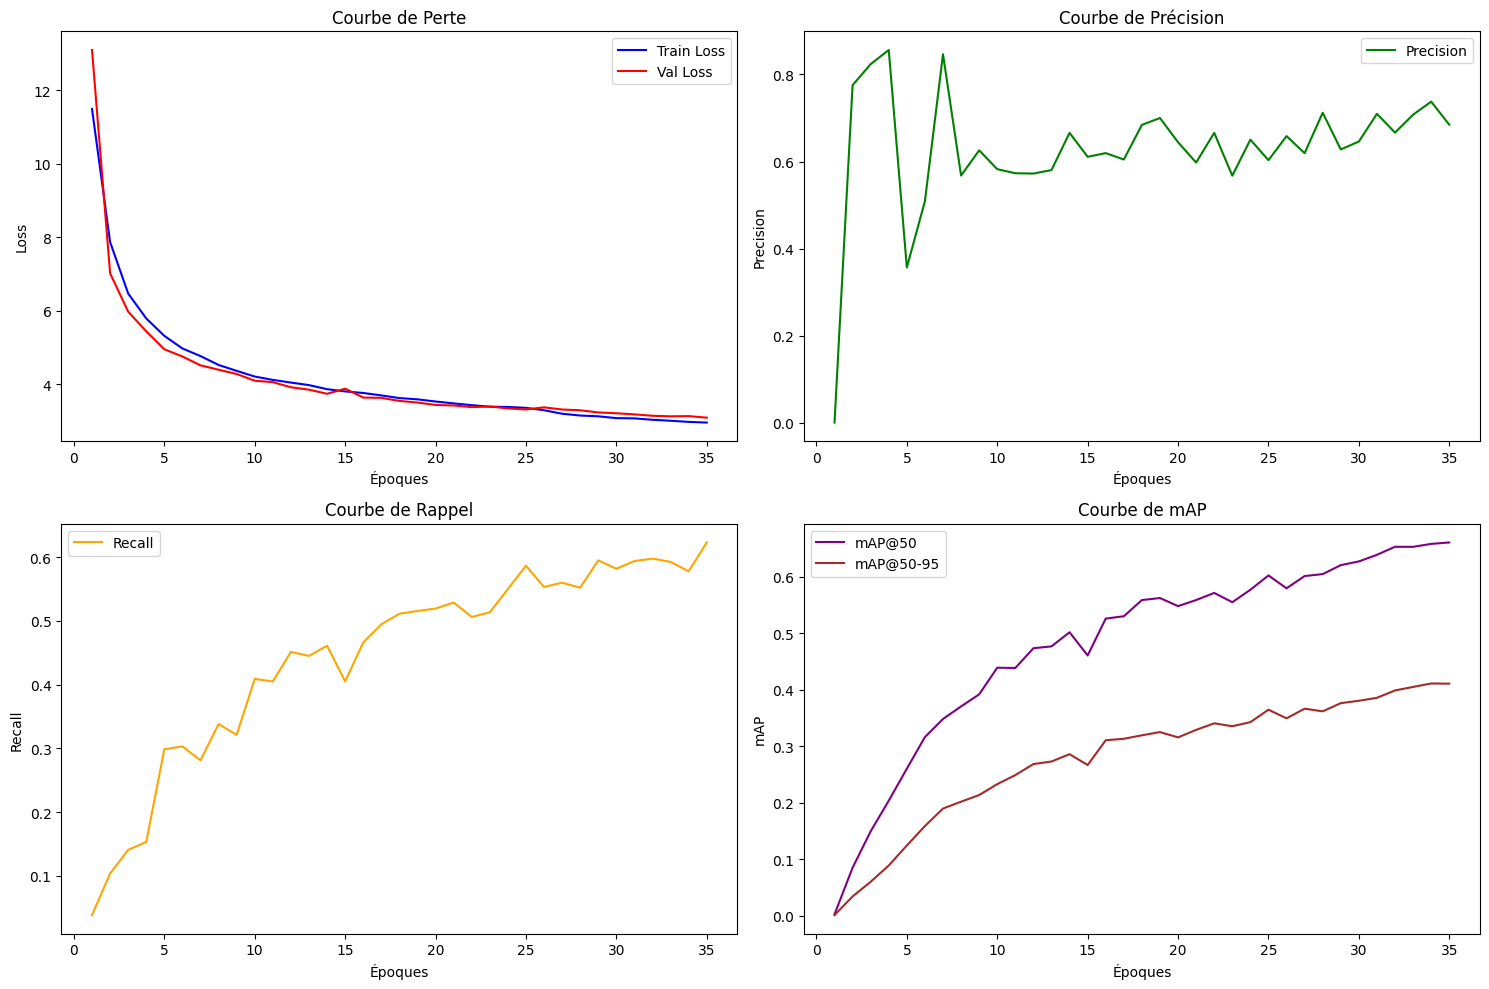

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# le chemin vers le répertoire des résultats d'entraînement
model_results_path = '/content/drive/MyDrive/Kitti3/model_trained/yolov8_trained'

# Chargement les fichiers de log d'entraînement
train_metrics_path = os.path.join(model_results_path, 'results.csv')

# Vérification l'existence du fichier results.csv
if os.path.exists(train_metrics_path):
    # Charger les métriques d'entraînement à partir du fichier CSV
    data = pd.read_csv(train_metrics_path)

    # Affichage les colonnes disponibles pour confirmer leur structure
    print("Colonnes disponibles :", data.columns)

    #  les courbes pertinentes
    epochs = data['epoch']
    train_box_loss = data['train/box_loss']
    train_cls_loss = data['train/cls_loss']
    train_dfl_loss = data['train/dfl_loss']
    train_loss = train_box_loss + train_cls_loss + train_dfl_loss  # Calculer la perte totale d'entraînement

    val_box_loss = data['val/box_loss']
    val_cls_loss = data['val/cls_loss']
    val_dfl_loss = data['val/dfl_loss']
    val_loss = val_box_loss + val_cls_loss + val_dfl_loss  # Calculer la perte totale de validation

    precision = data['metrics/precision(B)']
    recall = data['metrics/recall(B)']
    mAP50 = data['metrics/mAP50(B)']
    mAP50_95 = data['metrics/mAP50-95(B)']

    # Tracer les courbes
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Courbe de perte (train et validation)
    axes[0, 0].plot(epochs, train_loss, label='Train Loss', color='blue')
    axes[0, 0].plot(epochs, val_loss, label='Val Loss', color='red')
    axes[0, 0].set_title('Courbe de Perte')
    axes[0, 0].set_xlabel('Époques')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()

    # Courbe de précision
    axes[0, 1].plot(epochs, precision, label='Precision', color='green')
    axes[0, 1].set_title('Courbe de Précision')
    axes[0, 1].set_xlabel('Époques')
    axes[0, 1].set_ylabel('Precision')
    axes[0, 1].legend()

    # Courbe de rappel
    axes[1, 0].plot(epochs, recall, label='Recall', color='orange')
    axes[1, 0].set_title('Courbe de Rappel')
    axes[1, 0].set_xlabel('Époques')
    axes[1, 0].set_ylabel('Recall')
    axes[1, 0].legend()

    # Courbe de mAP (mAP50 et mAP50-95)
    axes[1, 1].plot(epochs, mAP50, label='mAP@50', color='purple')
    axes[1, 1].plot(epochs, mAP50_95, label='mAP@50-95', color='brown')
    axes[1, 1].set_title('Courbe de mAP')
    axes[1, 1].set_xlabel('Époques')
    axes[1, 1].set_ylabel('mAP')
    axes[1, 1].legend()

    # Ajuster l'espacement entre les graphiques
    plt.tight_layout()
    plt.show()

else:
    print(f"Le fichier 'results.csv' est introuvable dans {model_results_path}. Vérifiez si l'entraînement a généré ce fichier.")


Traitement de l'image : /content/drive/MyDrive/Kitti3/test/003497.png

image 1/1 /content/drive/MyDrive/Kitti3/test/003497.png: 224x640 6 Cars, 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)


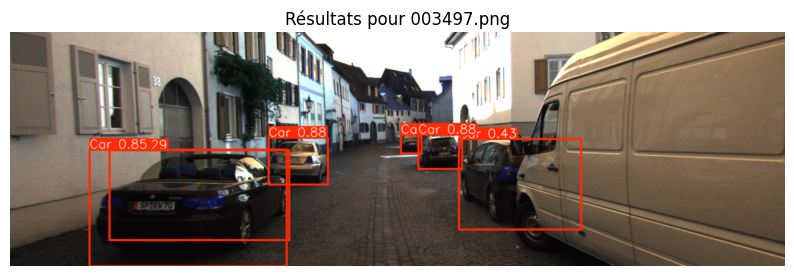

In [23]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# Chemin vers votre modèle entraîné
model_path = '/content/drive/MyDrive/Kitti3/model_trained/yolov8_trained/weights/best.pt'

#  le modèle entraîné
model = YOLO(model_path)

# Chemin vers le dossier contenant les images de test
test_images_path = '/content/drive/MyDrive/Kitti3/test'

#  le nom de l'image que vous voulez traiter
specific_image_name = '003497.png'

# le chemin complet vers cette image
specific_image_path = os.path.join(test_images_path, specific_image_name)

# Vérification si l'image existe
if not os.path.exists(specific_image_path):
    print(f"L'image spécifiée ({specific_image_name}) n'existe pas dans le dossier : {test_images_path}")
else:
    # Fonction pour afficher les résultats
    def display_results(image_path, results):
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir BGR en RGB
        result_image = results[0].plot()  # Générer une image avec les annotations
        plt.figure(figsize=(10, 10))
        plt.imshow(result_image)
        plt.axis('off')
        plt.title(f"Résultats pour {os.path.basename(image_path)}")
        plt.show()

    # Traiter et afficher l'image
    print(f"Traitement de l'image : {specific_image_path}")
    results = model(specific_image_path)  # Prédire avec YOLO
    display_results(specific_image_path, results)


Traitement de l'image : /content/drive/MyDrive/Kitti3/test/003490.png

image 1/1 /content/drive/MyDrive/Kitti3/test/003490.png: 224x640 4 Cars, 1 Cyclist, 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)


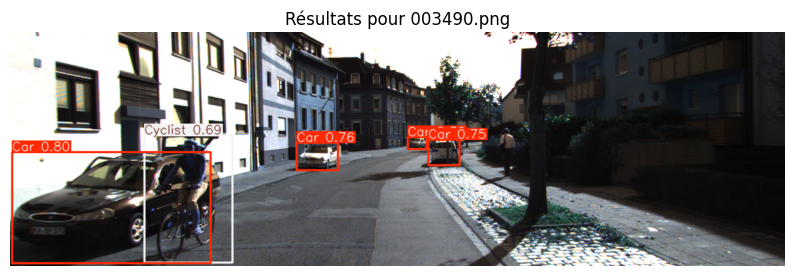

In [13]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# Chemin vers votre modèle entraîné
model_path = '/content/drive/MyDrive/Kitti3/model_trained/yolov8_trained/weights/best.pt'

# le modèle entraîné
model = YOLO(model_path)

# Chemin vers le dossier contenant les images de test
test_images_path = '/content/drive/MyDrive/Kitti3/test'

# le nom de l'image
specific_image_name = '003490.png'

# le chemin complet vers cette image
specific_image_path = os.path.join(test_images_path, specific_image_name)

# Vérification si l'image existe
if not os.path.exists(specific_image_path):
    print(f"L'image spécifiée ({specific_image_name}) n'existe pas dans le dossier : {test_images_path}")
else:
    # Fonction pour afficher les résultats
    def display_results(image_path, results):
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir BGR en RGB
        result_image = results[0].plot()  # Générer une image avec les annotations
        plt.figure(figsize=(10, 10))
        plt.imshow(result_image)
        plt.axis('off')
        plt.title(f"Résultats pour {os.path.basename(image_path)}")
        plt.show()

    # Traiter et afficher l'image
    print(f"Traitement de l'image : {specific_image_path}")
    results = model(specific_image_path)  # Prédire avec YOLO
    display_results(specific_image_path, results)


Traitement de l'image : /content/drive/MyDrive/Kitti3/test/003496.png

image 1/1 /content/drive/MyDrive/Kitti3/test/003496.png: 224x640 2 Cars, 1 Truck, 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)


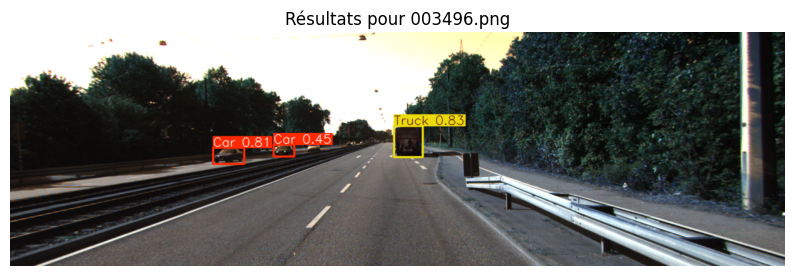

In [22]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# Chemin vers votre modèle entraîné
model_path = '/content/drive/MyDrive/Kitti3/model_trained/yolov8_trained/weights/best.pt'

#  le modèle entraîné
model = YOLO(model_path)

# Chemin vers le dossier contenant les images de test
test_images_path = '/content/drive/MyDrive/Kitti3/test'

#  le nom de l'image que vous voulez traiter
specific_image_name = '003496.png'

# le chemin complet vers cette image
specific_image_path = os.path.join(test_images_path, specific_image_name)

# Vérification si l'image existe
if not os.path.exists(specific_image_path):
    print(f"L'image spécifiée ({specific_image_name}) n'existe pas dans le dossier : {test_images_path}")
else:
    # Fonction pour afficher les résultats
    def display_results(image_path, results):
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir BGR en RGB
        result_image = results[0].plot()  # Générer une image avec les annotations
        plt.figure(figsize=(10, 10))
        plt.imshow(result_image)
        plt.axis('off')
        plt.title(f"Résultats pour {os.path.basename(image_path)}")
        plt.show()

    # Traiter et afficher l'image
    print(f"Traitement de l'image : {specific_image_path}")
    results = model(specific_image_path)  # Prédire avec YOLO
    display_results(specific_image_path, results)
